In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_original=pd.read_csv("C:\\Users\\singh\\Desktop\\Great Lakes Material\\titanic py\\train.csv")
test_original=pd.read_csv("test.csv")

In [4]:
train=train_original.copy()
test=test_original.copy()

In [5]:
train.shape,test.shape # test doesnot have the dependednt variable Survived

((891, 12), (418, 11))

In [6]:
train.dtypes #object epresents the categorical variables

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train[ (train['Age']>50)& (C2) | (C3)]

In [8]:
train['Age']>50

64

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train.isnull().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
train['Age'].fillna(value=train['Age'].median(),inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
train['Embarked'].value_counts()/train.shape[0]

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [23]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [27]:
train['Embarked'].fillna(value='S',inplace=True)

In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
del(train['Cabin'])

In [31]:
train['Age'].median()

28.0

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [50]:
train['Name'][0]

'Braund, Mr. Owen Harris'

In [49]:
train['Name'][0].split(",")

['Braund', ' Mr. Owen Harris']

In [51]:
train['Name'][0].split(",")[1]

' Mr. Owen Harris'

In [52]:
train['Name'][0].split(",")[1].split(".")

[' Mr', ' Owen Harris']

In [53]:
train['Name'][0].split(",")[1].split(".")[0]

' Mr'

In [34]:
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [42]:
x=[1,2,3,4,3,2,1,11,500]

In [43]:
np.median(x)

3.0

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [111]:
#lets fill the missing values in both train & test simultaneously
all_data=pd.concat([train.drop('Survived',axis=1),test],axis=0)
all_data.reset_index(drop=True,inplace=True)

In [31]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [112]:
#impute the Embarked column
all_data['Embarked'].value_counts(dropna=False)
all_data['Embarked'].fillna(value="S",inplace=True)
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

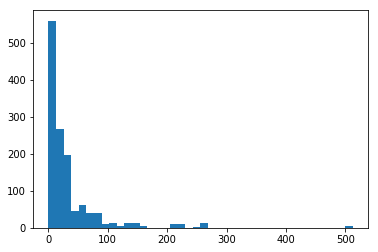

In [113]:
plt.hist(all_data['Fare'].dropna(),bins=40)
#find mean fare of all Pclass
all_data.groupby('Pclass')['Fare'].mean()

In [114]:
#impute Fare with Mean Fare of the same class
all_data[all_data['Fare'].isnull()]['Pclass']
all_data.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [115]:
all_data['Fare'].fillna(value=13.3,inplace=True)
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [124]:
#to impute the Age lets get the title out of the Name
all_data['Title']=[i.split(",")[1].split(" ")[1].split(".")[0] for i in all_data['Name']]

In [125]:
all_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Dona          1
Lady          1
the           1
Jonkheer      1
Sir           1
Capt          1
Don           1
Mme           1
Name: Title, dtype: int64

In [130]:
pd.crosstab(all_data['Title'],all_data['Age'].isnull())

Age,False,True
Title,,
Capt,1,0
Col,4,0
Don,1,0
Dona,1,0
Dr,7,1
Jonkheer,1,0
Lady,1,0
Major,2,0
Master,53,8


In [138]:
#write a function whihc imputes the Na for the tile given to it

def imp_Age(title):
    temp=all_data[all_data['Title']==title]
    mean_age=temp['Age'].mean()
    all_data.loc[(all_data['Age'].isnull()) &(all_data['Title']==title),'Age']=mean_age

In [166]:
for i in s[s[True]>0].index:
    imp_Age(i)

In [167]:
pd.crosstab(all_data['Title'],all_data['Age'].isnull())

Age,False
Title,
Capt,1
Col,4
Don,1
Dona,1
Dr,8
Jonkheer,1
Lady,1
Major,2
Master,61


In [168]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [169]:
#we will ignore the Cabin column from any modelling

In [170]:
#lest split the data back in the original ratio
train_imputed=train.head(train_original.shape[0])
test_imputed=test.tail(test_original.shape[0])